<a href="https://colab.research.google.com/github/YeonjeeJung/LearningRateStudy/blob/master/learning_rate_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


0it [00:00, ?it/s]

 99%|█████████▉| 169385984/170498071 [00:12<00:00, 17504666.84it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


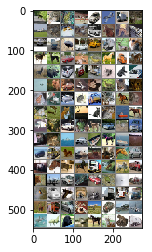

 deer   cat  frog horse


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, 5, padding = 2)
        self.pool = nn.MaxPool2d(3, stride = 2)
        self.conv2 = nn.Conv2d(64, 64, 5, padding = 2)
        self.conv3 = nn.Conv2d(64, 128, 5, padding = 2)
        self.fc1 = nn.Linear(1152, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 1152)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
net.cuda()

Net(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)
# scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.9)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 50)

In [5]:
EPOCH = 45

train_loss = []
test_loss = []

train_acc = []
test_acc = []

learning_rate = []

for epoch in range(EPOCH):  # loop over the dataset multiple times

    print('Epoch %d' % (epoch+1))
    print(optimizer.param_groups[0]['lr'])

    learning_rate.append(optimizer.param_groups[0]['lr'])

    # loss for show
    running_loss = 0.0
    
    # loss for draw graph
    sum_train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs.cuda()).cpu()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # print statistics
        sum_train_loss += loss.item()
        
    print('Accuracy of the network on the train images: %d %%' % (100 * train_correct / train_total))
            
    train_loss.append(sum_train_loss / train_total)
    train_acc.append(train_correct / train_total)
    
    # loss for draw graph
    sum_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images.cuda()).cpu()
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            sum_loss += loss.item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    
    test_loss.append(sum_loss / total)
    test_acc.append(correct / total)

    scheduler.step()
    

print('Finished Training')

Epoch 1
0.01


170500096it [00:29, 17504666.84it/s]                               

Accuracy of the network on the train images: 35 %
Accuracy of the network on the 10000 test images: 49 %
Epoch 2
0.009990133642141357
Accuracy of the network on the train images: 55 %
Accuracy of the network on the 10000 test images: 61 %
Epoch 3
0.00996057350657239
Accuracy of the network on the train images: 66 %
Accuracy of the network on the 10000 test images: 67 %
Epoch 4
0.009911436253643444
Accuracy of the network on the train images: 72 %
Accuracy of the network on the 10000 test images: 72 %
Epoch 5
0.009842915805643155
Accuracy of the network on the train images: 76 %
Accuracy of the network on the 10000 test images: 73 %
Epoch 6
0.009755282581475769
Accuracy of the network on the train images: 79 %
Accuracy of the network on the 10000 test images: 75 %
Epoch 7
0.009648882429441256
Accuracy of the network on the train images: 82 %
Accuracy of the network on the 10000 test images: 76 %
Epoch 8
0.009524135262330098
Accuracy of the network on the train images: 85 %
Accuracy of t

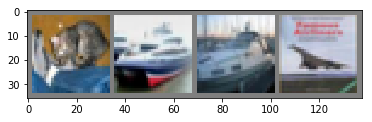

GroundTruth:    cat  ship  ship plane


In [6]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
outputs = net(images.cuda()).cpu()

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [8]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.cuda()).cpu()
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 83 %
Accuracy of   car : 88 %
Accuracy of  bird : 72 %
Accuracy of   cat : 63 %
Accuracy of  deer : 77 %
Accuracy of   dog : 72 %
Accuracy of  frog : 87 %
Accuracy of horse : 83 %
Accuracy of  ship : 89 %
Accuracy of truck : 85 %


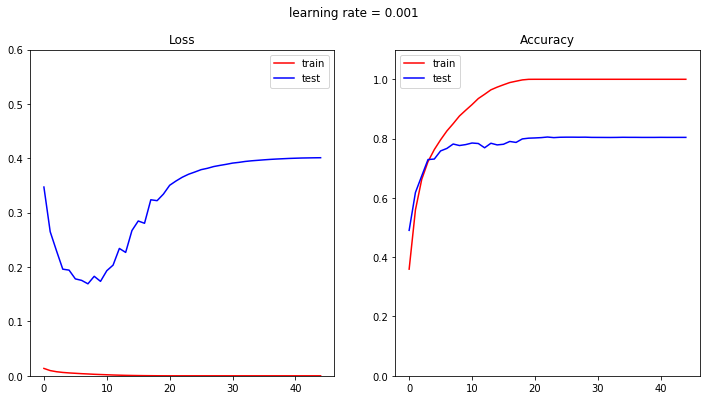

train_loss =  [0.013559714462757111, 0.009589107016324996, 0.007511116986274719, 0.006189122102856636, 0.005287792711257935, 0.004603525487184524, 0.003918750230669976, 0.0033761875531077385, 0.002771503759622574, 0.002335580097138882, 0.0019044965359568595, 0.0014628490810096263, 0.0011345175167173148, 0.0008302144460752606, 0.0006159058167412877, 0.0004297018505632877, 0.00028318579077720645, 0.00018622940079309047, 7.681475036079065e-05, 1.890981506148819e-05, 7.413575216778554e-06, 5.310321362630929e-06, 4.392069695459213e-06, 3.8126243272563443e-06, 3.421559825510485e-06, 3.1186459731543437e-06, 2.8860081087623256e-06, 2.696295132045634e-06, 2.550155173521489e-06, 2.4250689151813276e-06, 2.321781881910283e-06, 2.229666678904323e-06, 2.160245550185209e-06, 2.0932168482249837e-06, 2.040999628807185e-06, 1.9982520818302872e-06, 1.9569308747304603e-06, 1.9244976915069854e-06, 1.8974145306856372e-06, 1.8719852274807635e-06, 1.8524945445824414e-06, 1.8374769610818475e-06, 1.825091917198

In [9]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

fig.suptitle('learning rate = 0.001')

ax1.plot(train_loss, c='r', label='train')
ax1.plot(test_loss, c='b', label='test')
ax2.plot(train_acc, c='r', label='train')
ax2.plot(test_acc, c='b', label='test')

ax1.title.set_text('Loss')
ax2.title.set_text('Accuracy')

ax1.set_ylim([0,0.6])
ax2.set_ylim([0,1.1])

ax1.legend()
ax2.legend()

plt.show()

print('train_loss = ', train_loss)
print('test_loss = ', test_loss)
print('train_acc = ', train_acc)
print('test_acc = ', test_acc)
print('learning_rate = ', learning_rate)